#### 1.2.1---Segment the given image using normalized graph-cuts. Vary the following parameters (try several values of each parameter): compactness and n_segments (slic function), thresh (cut normalized function). Display segmentation results for several parameters and state their effect on the output. (10 points)

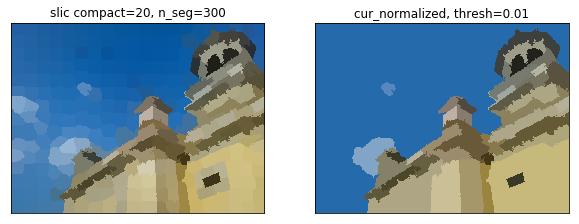

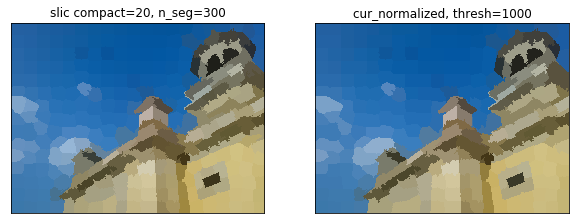

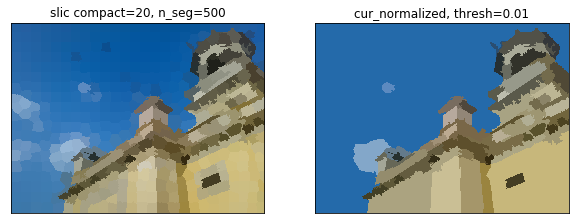

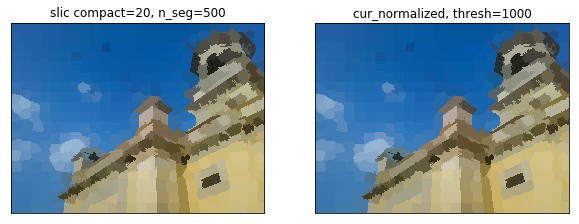

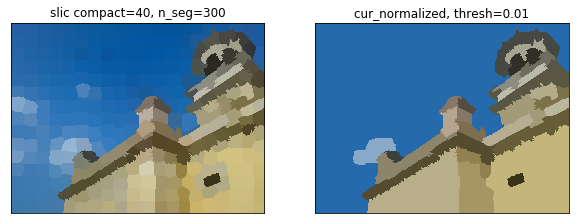

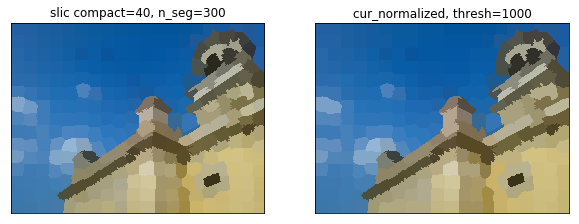

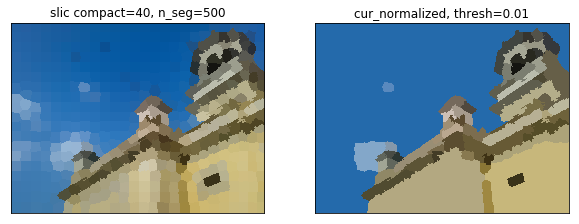

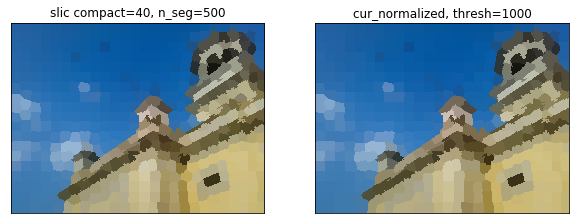

In [2]:
from skimage import segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt
import cv2
import numpy as np

# Read image
img = cv2.cvtColor(cv2.imread('home.jpg'), cv2.COLOR_BGR2RGB)

# define compactness and n_segments array
compactness_arr = np.array([20,40])
n_segments_arr = np.array([300,500])
thresh_arr = np.array([0.01,1000])
out1_arr = []
out2_arr = []

for i in range(compactness_arr.shape[0]):
    for j in range(n_segments_arr.shape[0]):
        for k in range(thresh_arr.shape[0]):
            # apply k-means. This will generate super pixels
            labels1 = segmentation.slic(img, compactness=compactness_arr[i], n_segments=n_segments_arr[j])
            out1 = color.label2rgb(labels1, img, kind='avg')
            out1_arr.append(out1)

            # apply graph cut
            g = graph.rag_mean_color(img, labels1, mode='similarity')
            labels2 = graph.cut_normalized(labels1,g,thresh=thresh_arr[k])
            out2 = color.label2rgb(labels2, img, kind='avg')
            out2_arr.append(out2)
        
# display
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(out1_arr[0])
plt.title("slic compact=20, n_seg=300"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(out2_arr[0])
plt.title("cur_normalized, thresh=0.01"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(out1_arr[1])
plt.title("slic compact=20, n_seg=300"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(out2_arr[1])
plt.title("cur_normalized, thresh=1000"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(out1_arr[2])
plt.title("slic compact=20, n_seg=500"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(out2_arr[2])
plt.title("cur_normalized, thresh=0.01"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(out1_arr[3])
plt.title("slic compact=20, n_seg=500"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(out2_arr[3])
plt.title("cur_normalized, thresh=1000"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(out1_arr[4])
plt.title("slic compact=40, n_seg=300"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(out2_arr[4])
plt.title("cur_normalized, thresh=0.01"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(out1_arr[5])
plt.title("slic compact=40, n_seg=300"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(out2_arr[5])
plt.title("cur_normalized, thresh=1000"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(out1_arr[6])
plt.title("slic compact=40, n_seg=500"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(out2_arr[6])
plt.title("cur_normalized, thresh=0.01"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(out1_arr[7])
plt.title("slic compact=40, n_seg=500"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(out2_arr[7])
plt.title("cur_normalized, thresh=1000"), plt.xticks([]), plt.yticks([])
plt.show()

#### Effect of Parameters on Output:

n_segments is the number of labels in the segmented output image. Higher n_segments would result in higher number of colour patches on the image.

compactness is the balance between colour and space proximity. Higher value would place more weight on space proximity, resulting in more cubic superpixel shapes. 

thresh defines the cut-off point for N-cut. The subgraph would not be divided further if the value of N-cut exceeds value of thresh. Higher thresh would generate an image with distinct edges for the superpixel(image segments). 



#### 1.2.2---Segment the given image using mean-shift. Vary the following parameters (try several values of each parameter): ratio, kernel size, max dist. Display segmentation results for several parameters and state their effect on the output. (10 points)

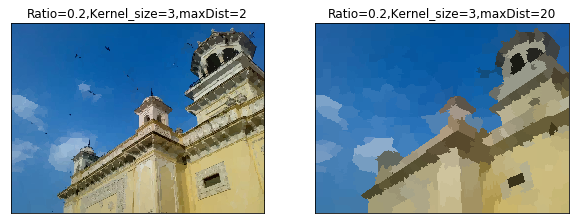

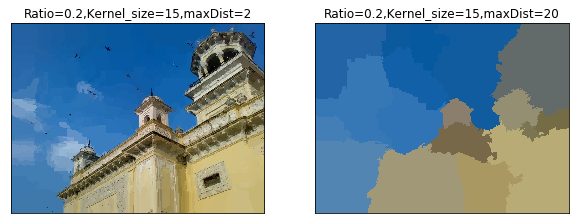

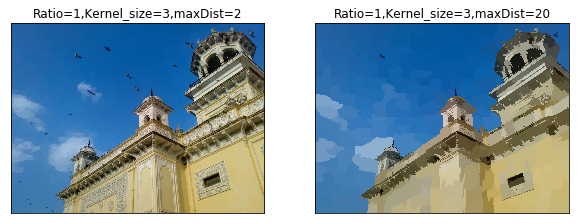

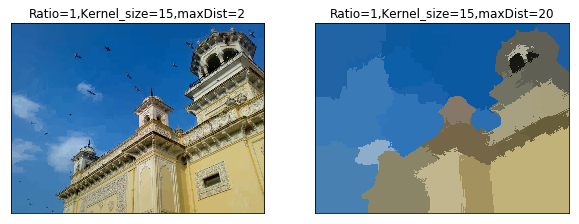

In [3]:
from skimage.segmentation import quickshift
from matplotlib import pyplot as plt
import cv2
import numpy as np

# Read image
img = cv2.cvtColor(cv2.imread('home.jpg'), cv2.COLOR_BGR2RGB)

# create parameter arrays
ratio_arr = np.array([0.2,1])
kernel_size_arr = np.array([3,15])
max_dist_arr = np.array([2,20])
image_out_arr = []

for i in range(ratio_arr.shape[0]):
    for j in range(kernel_size_arr.shape[0]):
        for k in range(max_dist_arr.shape[0]):
            # apply meanshift
            label = quickshift(img, ratio=ratio_arr[i],
                               kernel_size=kernel_size_arr[j]
                               ,max_dist=max_dist_arr[k])
            out = color.label2rgb(label, img, kind='avg')
            image_out_arr.append(out)
            
# display
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(image_out_arr[0])
plt.title("Ratio=0.2,Kernel_size=3,maxDist=2"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(image_out_arr[1])
plt.title("Ratio=0.2,Kernel_size=3,maxDist=20"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(image_out_arr[2])
plt.title("Ratio=0.2,Kernel_size=15,maxDist=2"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(image_out_arr[3])
plt.title("Ratio=0.2,Kernel_size=15,maxDist=20"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(image_out_arr[4])
plt.title("Ratio=1,Kernel_size=3,maxDist=2"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(image_out_arr[5])
plt.title("Ratio=1,Kernel_size=3,maxDist=20"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(image_out_arr[6])
plt.title("Ratio=1,Kernel_size=15,maxDist=2"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(image_out_arr[7])
plt.title("Ratio=1,Kernel_size=15,maxDist=20"), plt.xticks([]), plt.yticks([])

plt.show()

Ratio is the balance between color-space and image-space proximity. A higher ratio would place more weight on color-space, and the output image would be more clear in the sense that the edges are more crisp and the number of clusters in the image is more. 

The kernel_size determines the size of the Gaussian kernel that is used to smooth the image. Higher kernel_size would give less clusters, since the pixels are blurred and there is less difference between them to distinguish them into different clusters.  

The max_dist defines the cut-off threshold for data distances. Higher max_dist generates fewer clusters because more data points are selected.